In [6]:
install.packages("gridExtra")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [8]:
library(ggplot2)
require(forecast)
library(gridExtra)


Data Characteristics 
--
For the later experimental part of the paper, we decided to compare performance of the imputation algorithms on four different time series datasets provided in the TSA (Chan and Ripley, 2012) package. One reason for choosing these datasets (besides other reasons explained in the following paragraphs) is, that these are well-known and frequently used in literature.  

(PDF) Comparison of different Methods for Univariate Time Series Imputation in R. Available from: https://www.researchgate.net/publication/282906368_Comparison_of_different_Methods_for_Univariate_Time_Series_Imputation_in_R [accessed Oct 12 2019].

Two common approaches to describe and examine time series are autocorrelation analysis and
separation into trend , seasonal and irregular components.

Decomposition
--
Time series data can show a huge variety of patterns and, for analysis, it can be useful to isolate
these patterns in separate series. Time series decomposition seeks to split the time series into single
component series each representing a certain characteristic or pattern. (the original time series can
later on be reconstructed by additions or multiplications of these components)
There are typically three components of interest:
* trend component - expresses the long term progression of the time series (secular variation).
This means there is a long term increase or decrease in the mean level. The trend does not
necessarily have to be linear.
* seasonal component - reflects level shifts that repeat systematically within the same period
(seasonal variation). This means there is a common pattern repeating for example every month,
quarter of the year or day of the week. Seasonality is always of a fixed and known period.

* irregular component - describes irregular influences. These are the residuals, after the other
components have been removed from the time series. The irregular component may be, but is
not necessarily completely random. It can show autocorrelation and cycles of unpredictable
duration.
There are different techniques for doing the decomposition into components. The basic method is
a decomposition by moving averages, but there exist more robust and versatile methods like STL
(Seasonal and Trend decomposition using Loess) decomposition (Cleveland et al., 1990). In figure 2 a
STL decomposition of the air passengers dataset can be seen.
<b>Considering trend and seasonal influences is very important for the results of time series analysis. 
Getting trend and seasonal effects right can improve forecasting and even imputation results a lot.
Thus decomposition is a popular technique and especially often used for seasonal adjustment</b>

<b>no trend, no seasonality (google)<b/>

In [28]:
dfDadosESC=readRDS("../plumber/dfDadosESC.norm.rds")
dfDadosIoTa=readRDS("../plumber/dfDadosIoTa.norm.rds")
a=rep(seq(1,8640,1),30)
dfDadosESC$dadosDia=rep(1:nrow(dfDados))
dfDadosIoTa$dadosDia=rep(1:nrow(dfDados))

obs=seq(1,8640,1)

total=nrow(dfDadosESC)
xBreak=seq(total/30,total, total/30) 
xLabel=seq(1:30)

p1=ggplot(data=dfDadosESC,aes(y=dados, x=dadosDia)) + geom_line(size=0.2)+labs(x="Dias", y="Consumo") + scale_x_continuous(expand = c(0, 0), breaks= xBreak, label = xLabel) + scale_y_continuous(expand = c(0, 0))+
ggtitle("ÉdaSuaConta")+  theme(plot.title = element_text(hjust = 0.5, size=9))

p2=ggplot(data=dfDadosIoTa,aes(y=dados, x=dadosDia)) + geom_line(size=0.2)+labs(x="Dias", y="Consumo") + scale_x_continuous(expand = c(0, 0), breaks= xBreak, label = xLabel) + scale_y_continuous(expand = c(0, 0))+ 
ggtitle("IoTaWatt")+  theme(plot.title = element_text(hjust = 0.5, size=9))
options(repr.plot.width=10, repr.plot.height=5)


#grid.arrange(p1,p2,nrow=2)


In [ ]:
q=list()
cont=1
for (i in seq(2,30,7)){
    q[[cont]]=ggplot(dfDadosESC[which(dfDados$dia==i ),], aes(obs,dados))+
    geom_line(size=0.5)+
    labs(x="Observation", y="Consumption")+
    scale_x_continuous(expand = c(0, 0), breaks= xBreak, label = xLabel) + scale_y_continuous(expand = c(0, 0))+
    theme(axis.text=element_text(size=1))+
    ggtitle(paste("Quarta",i))+  theme(plot.title = element_text(hjust = 0.5, size=5))+
    theme(axis.text=element_text(size=5),axis.title=element_blank())
    cont=cont+1
}
do.call(grid.arrange,c(q, ncol=1, top = "Quartas-Feiras"))



In [98]:
plots=function(dfDado, semana){
    q=list()
    days=c("Terça", "Quarta", "Quinta", "Sexta", "Sábado", "Domingo", "Segunda")
    options(repr.plot.width=10, repr.plot.height=5)
    cont=1
    total=8640
    xBreak=seq(0,total, total/4)
    xLabel=seq(0,24,6)
    for (i in seq(1,30,7)){
        q[[cont]]=ggplot(dfDado[which(dfDado$dia==i ),], aes(obs,dados))+
        geom_line(size=0.5)+
        labs(x="Observation", y="Consumption")+
        scale_x_continuous(expand = c(0, 0), breaks= xBreak, label = xLabel) + scale_y_continuous(expand = c(0, 0))+
        theme(axis.text=element_text(size=1))+
        ggtitle(paste(days[semana],i))+  theme(plot.title = element_text(hjust = 0.5, size=5))+
        theme(axis.text=element_text(size=5),axis.title=element_blank())
        cont=cont+1
    }
    do.call(grid.arrange,c(q, ncol=1, top = days[semana]))
}


In [103]:
#segunda=plots(dfDadosESC, 7)
#terca=plots(dfDadosESC, 1)
#quarta=plots(dfDadosESC, 2)
#quinta=plots(dfDadosESC, 3)
#sexta=plots(dfDadosESC, 4)
#sabado=plots(dfDadosESC, 5)
#domingo=plots(dfDadosESC, 6)

In [105]:
head(dfDadosESC)

dados,dia,hora,minuto,segundo,semana,dadosDia
0.1036690,1,0,0,0,3,1
0.1031480,1,0,0,10,3,2
0.1031480,1,0,0,20,3,3
0.1021805,1,0,0,30,3,4
0.1002456,1,0,0,40,3,5
0.1024782,1,0,0,50,3,6


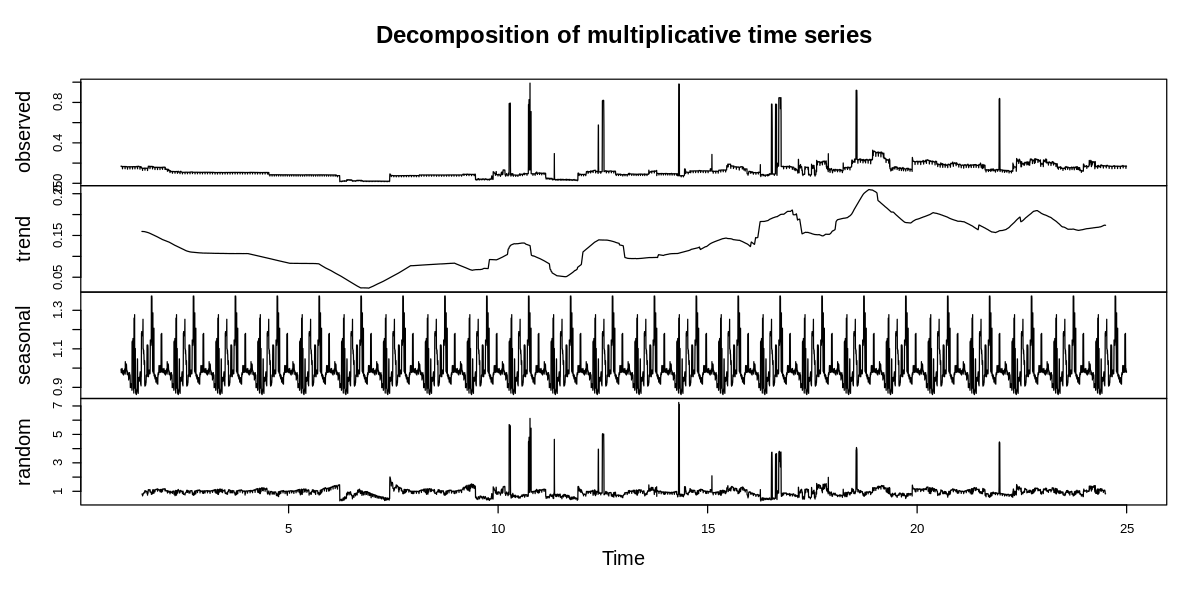

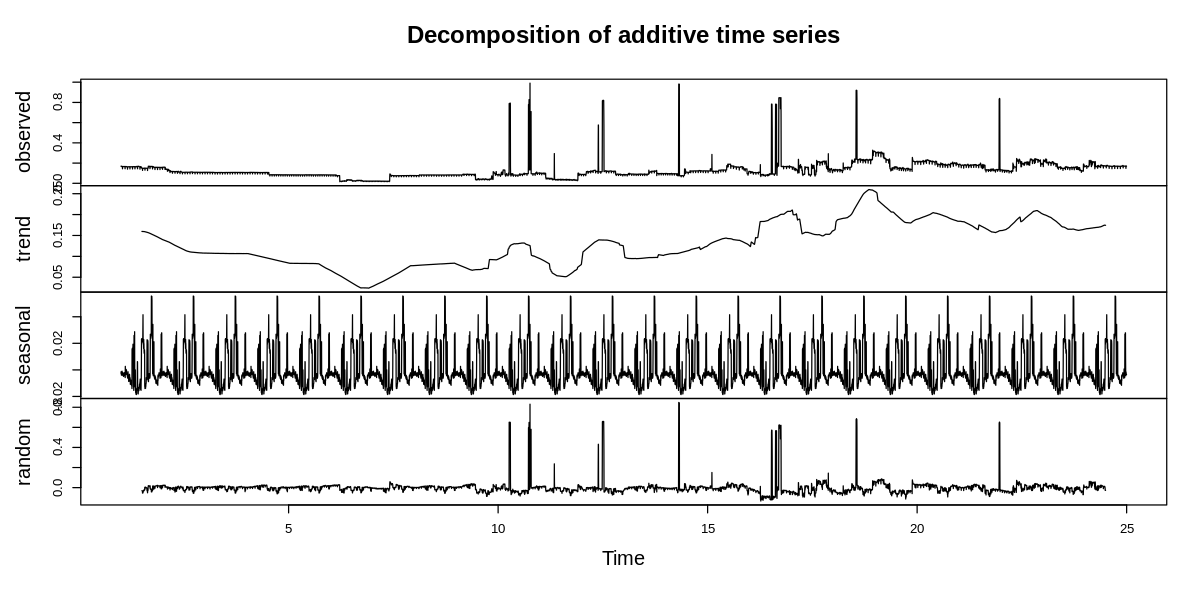

In [117]:
tsData=dfDados[which(dfDados$dia==2),1]
#tsData=dfDadosESC$dados
xx <- ts(tsData, frequency = 360)
stlRes <- stl(xx, s.window = "periodic")
decomposedRes <- decompose(xx, type="mult")
plot (decomposedRes) # see plot below
maDecomp <- decompose(xx)
plot(maDecomp)

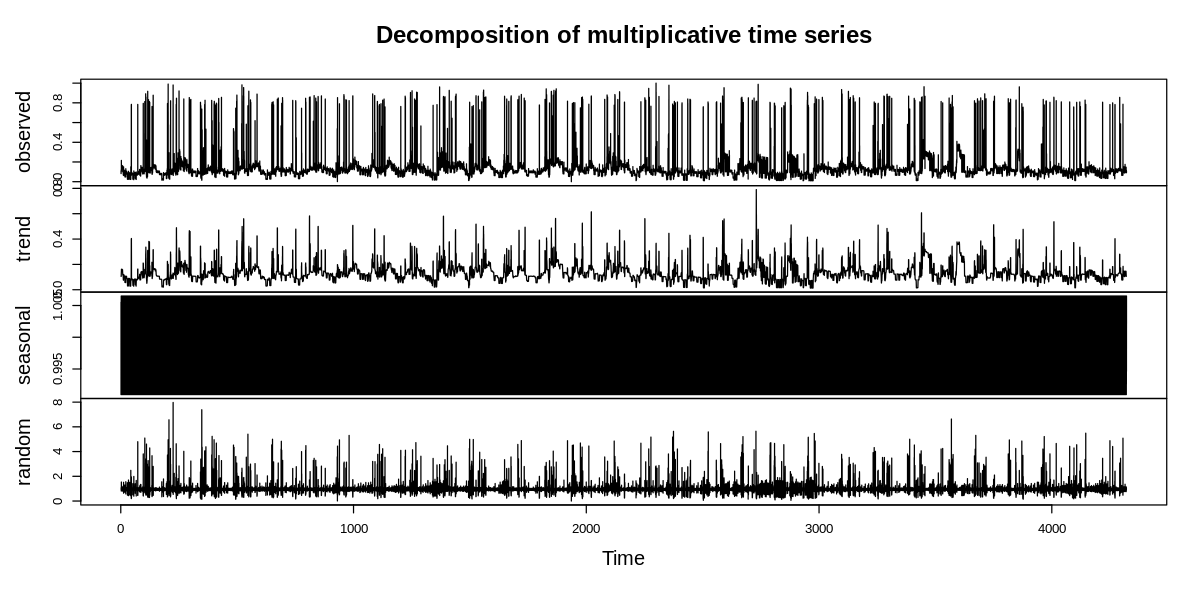

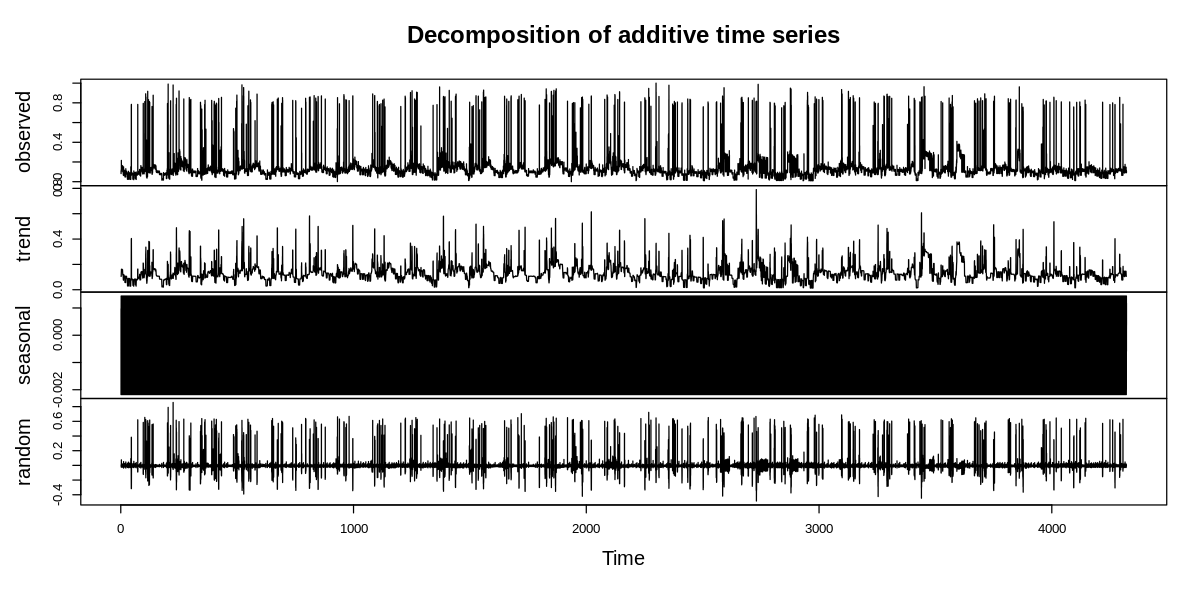

In [109]:
tsData=dfDados[which(dfDados$dia==1),1]
#tsData=dfDadosESC$dados
xx <- ts(tsData, frequency = 60)
stlRes <- stl(xx, s.window = "periodic")
decomposedRes <- decompose(xx, type="mult")
plot (decomposedRes) # see plot below
maDecomp <- decompose(xx)
plot(maDecomp)

In [ ]:
#tsData=dfDados[which(dfDados$dia==1),1]
tsData=dfDadosIoTdos
xx <- ts(tsData, frequency = 8640)
head(xx)
stlRes <- stl(xx, s.window = "periodic")
decomposedRes <- decompose(xx, type="mult")
plot (decomposedRes) # see plot below
maDecomp <- decompose(tsData)
plot(maDecomp)

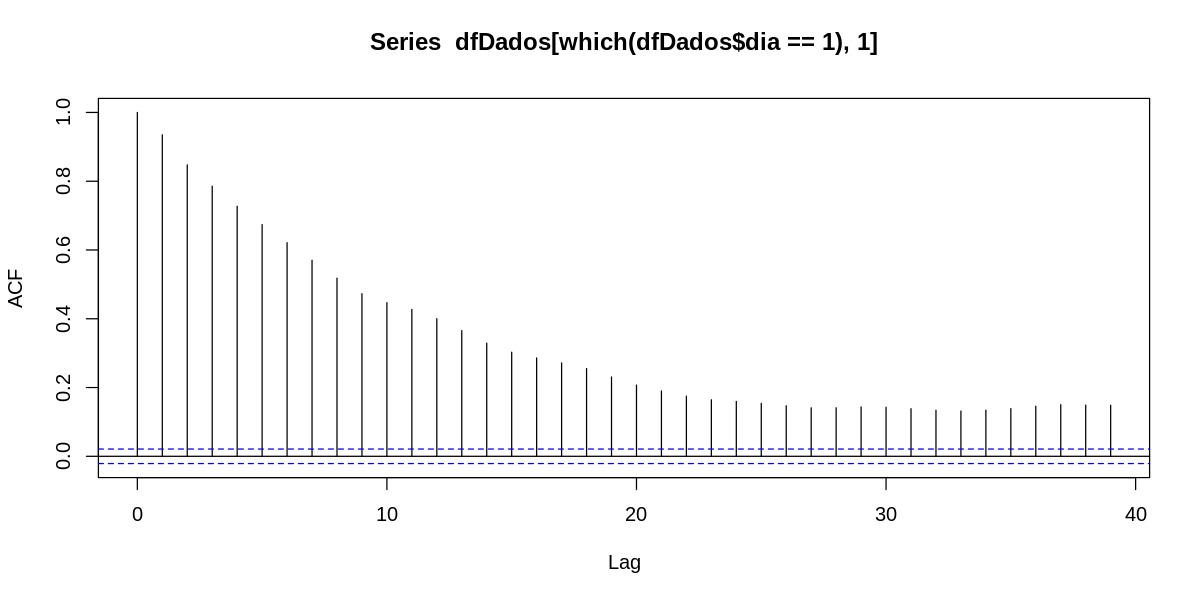

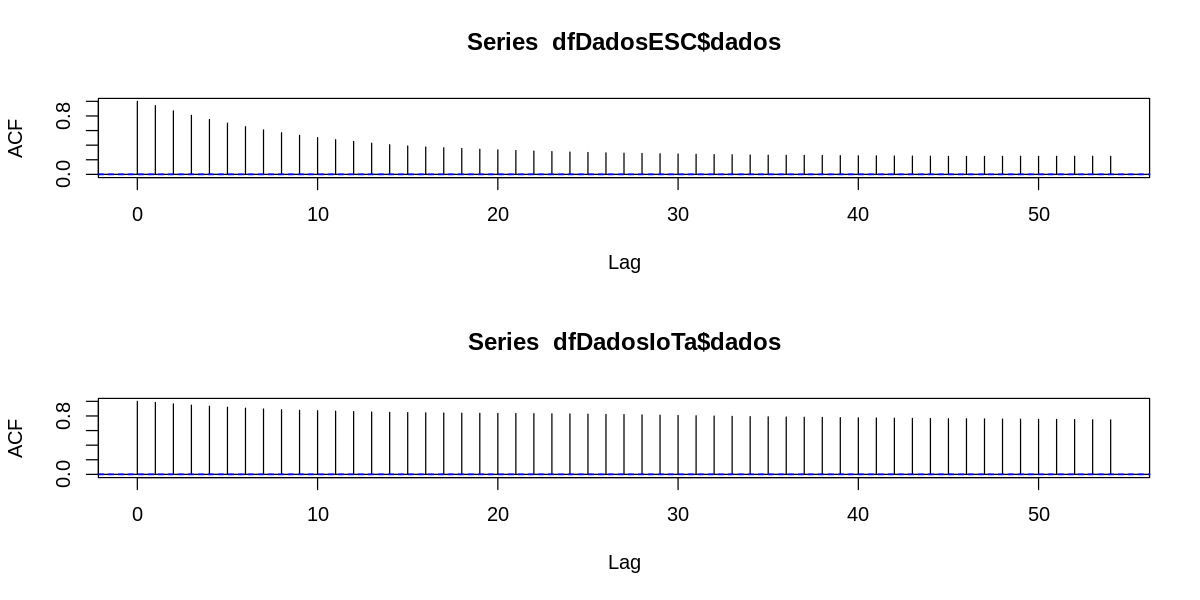

In [122]:
acf(dfDados[which(dfDados$dia==1),1])
par(mfrow=c(2,1))
acf(dfDadosESC$dados)
acf(dfDadosIoTa$dados)
